# Exploración de los datos:

Se hace un primer acercamiento a los datos que podrían ser utilizados en el proyecto. 

Estos han sido obtenidos de la pagina del [Instituto Nacional de Salud](http://www.ins.gov.co/lineas-de-accion/Subdireccion-Vigilancia/sivigila/Paginas/vigilancia-rutinaria.aspx) y puestos en un [repositorio](http://nbviewer.ipython.org/github/pyUniversidad/DatosDeSalud/tree/master/) para luego visualizarlos en gráficas.

In [1]:
%matplotlib nbagg

import warnings
warnings.filterwarnings("ignore")

from openpyxl import load_workbook 

import os
import matplotlib.pyplot as plt
import numpy as np

Archivos=sorted(os.listdir('Vigilancia_Depart'))
Leer=lambda archivo:load_workbook(filename = 'Vigilancia_Depart/'+archivo,read_only=True)

#Lista con los libros xlsx leidos:
Libros=map(Leer,Archivos[:5])

Value= lambda openpycell: openpycell.value
Gentoval=lambda openpycell: map(Value,openpycell)

#Matriz representativa de los xlsx [2009,2013]
MxLibros= [np.array(map(Gentoval,Libros[i]['Vigilancia Dep']['A0:BD1318'])) for i in range(len(Libros))]

In [2]:
#Ubicación de Bogotá:
UbiBog=[np.argwhere(MxLibros[i][:,1]=='BOGOTA') for i in range(len(Libros))]

In [3]:
#Fin del rango de enfermendades para Bogotá:
FinBog=[np.argwhere(MxLibros[i][:,1]=='BOLIVAR')-2 for i in range(len(Libros))]

In [4]:
#Se forma una lista que contiene Año-Semana Semana 0-->2009-1 ; Semana 259-->2013-52
Semana=[]
for i in range(5):
    for j in range(52):
        Semana.append(str(2009+i)+'-'+str(j+1))

SemT=[Semana[i] for i in range(len(Semana)) if i%16==0]        

<IPython.core.display.Javascript object>


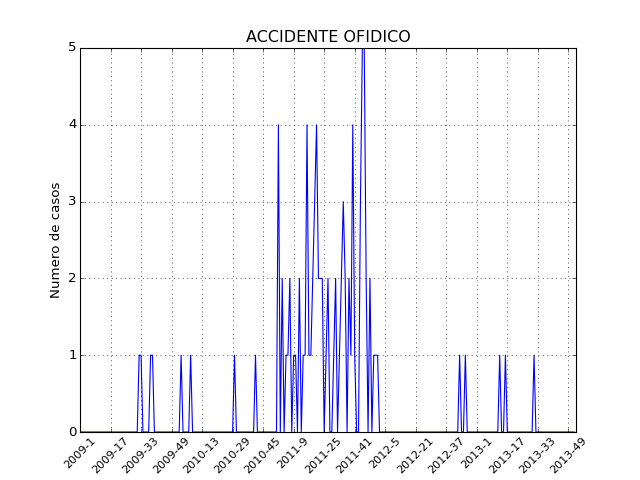

<IPython.core.display.Javascript object>


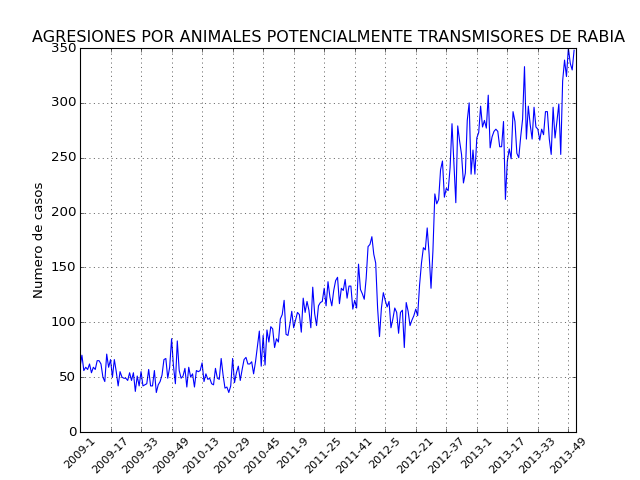

<IPython.core.display.Javascript object>


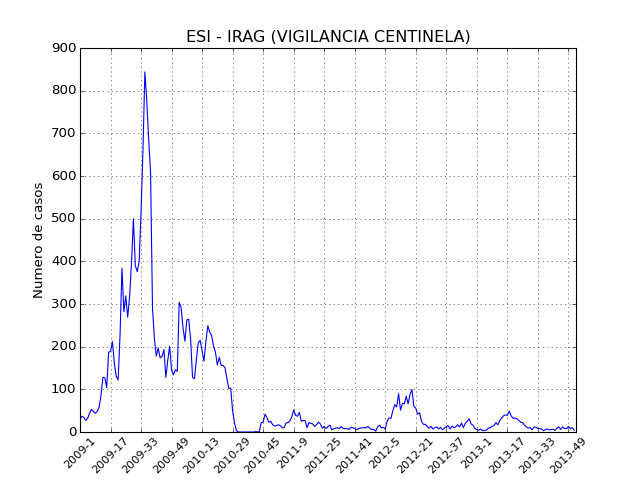

<IPython.core.display.Javascript object>


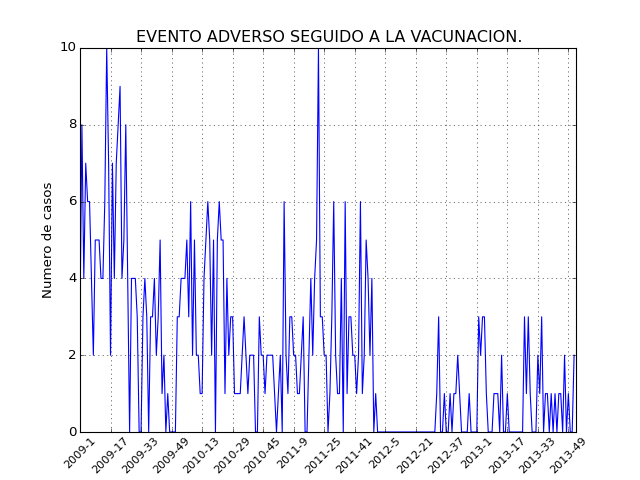

<IPython.core.display.Javascript object>


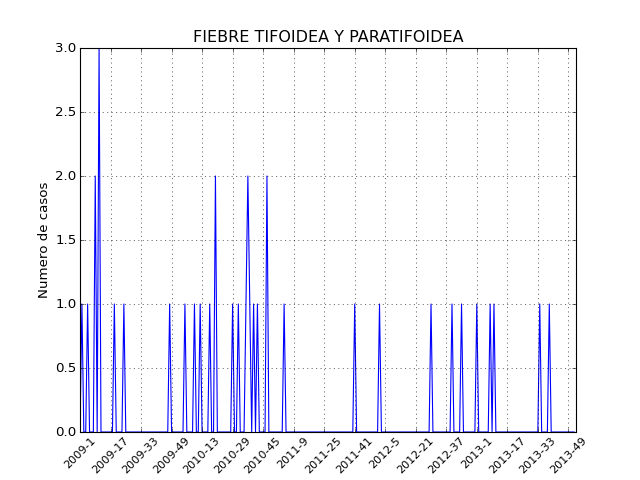

<IPython.core.display.Javascript object>


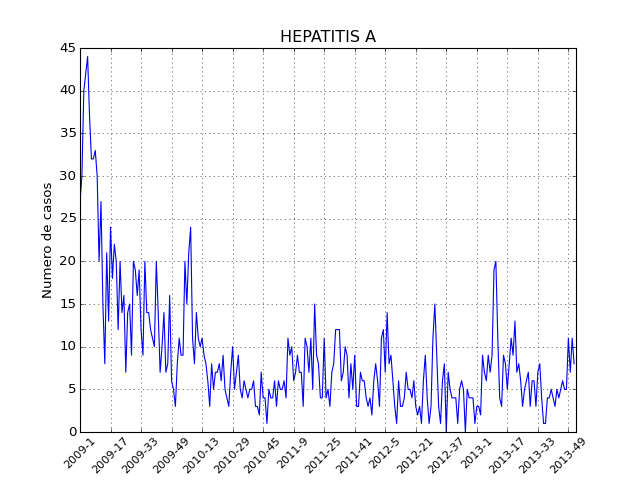

<IPython.core.display.Javascript object>


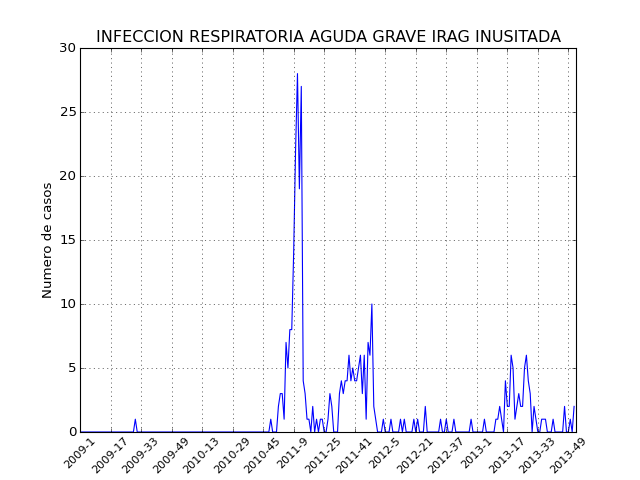

<IPython.core.display.Javascript object>


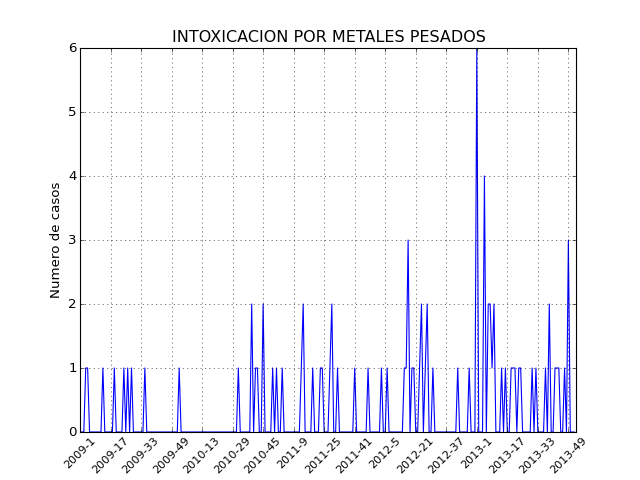

<IPython.core.display.Javascript object>


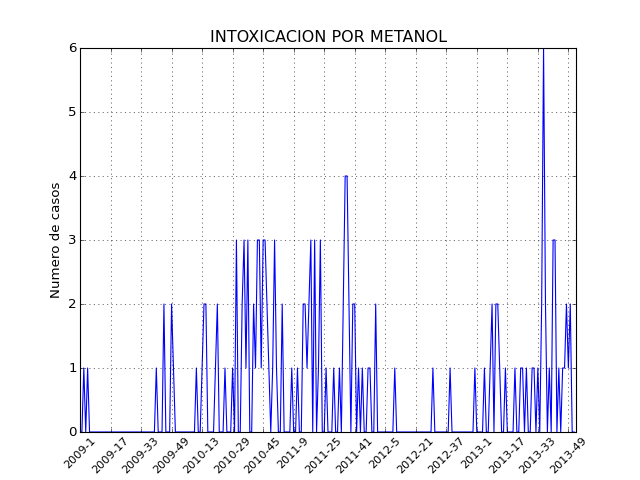

<IPython.core.display.Javascript object>


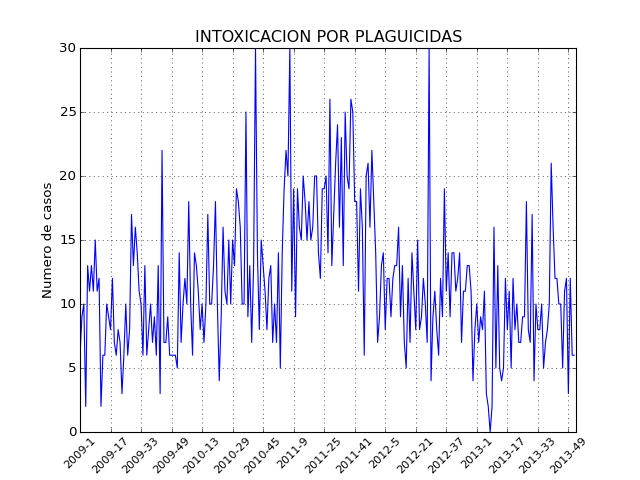

<IPython.core.display.Javascript object>


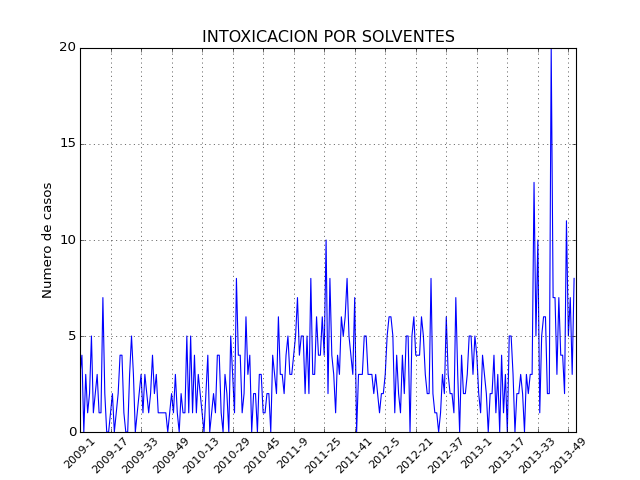

<IPython.core.display.Javascript object>


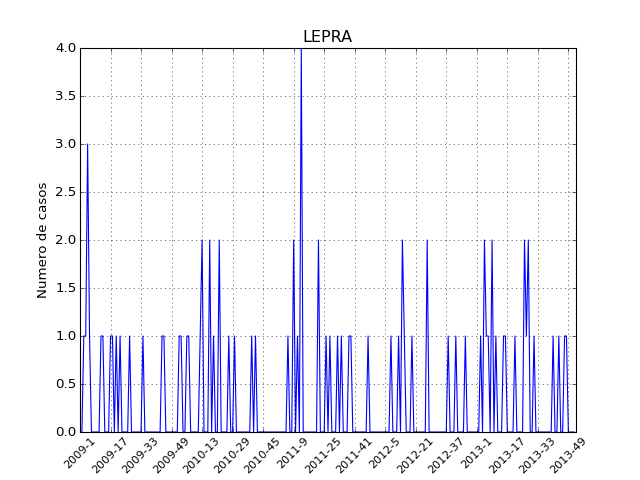

<IPython.core.display.Javascript object>


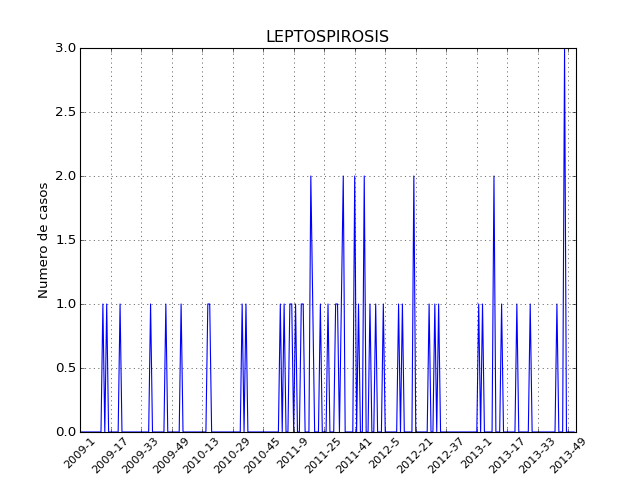

<IPython.core.display.Javascript object>


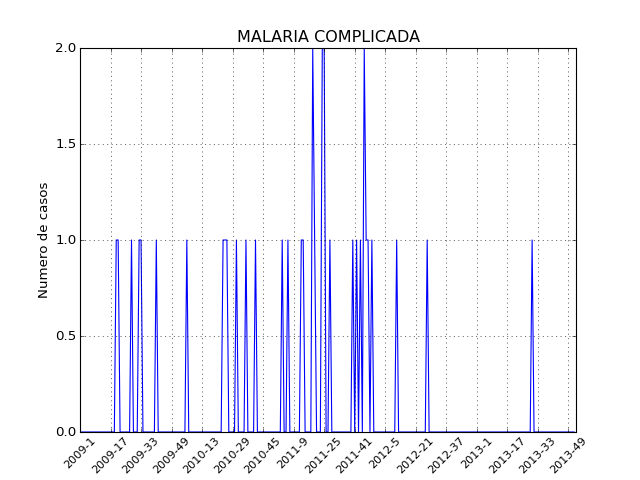

No se encontro MALARIA VIVAX en Vigilancia rutinaria Departamental 2011.xlsx


<IPython.core.display.Javascript object>


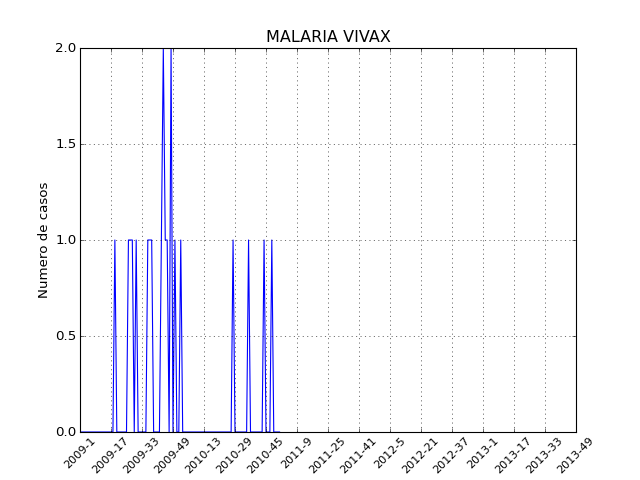

<IPython.core.display.Javascript object>


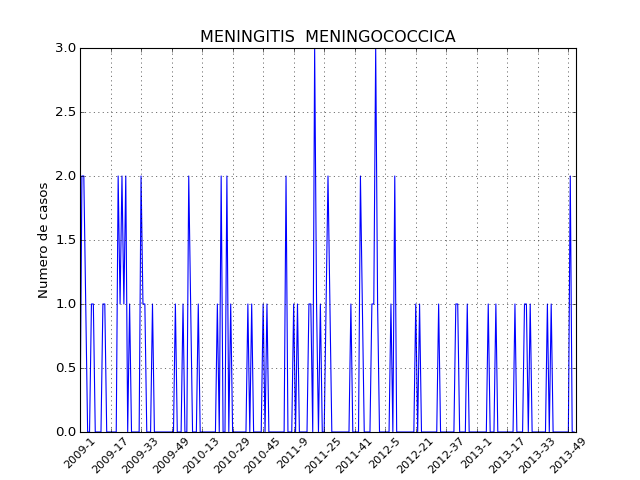

<IPython.core.display.Javascript object>


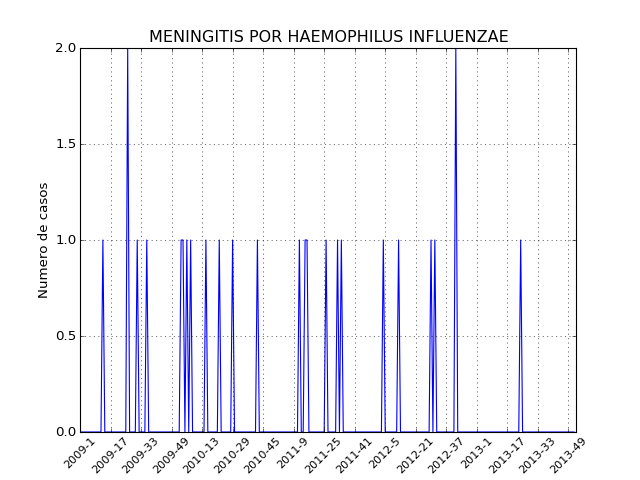

<IPython.core.display.Javascript object>


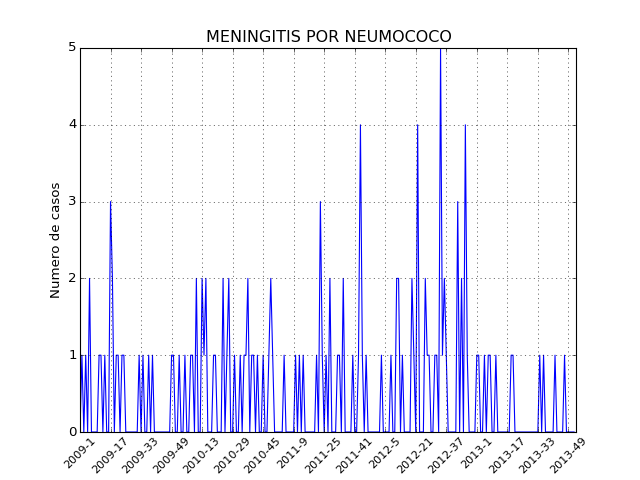

<IPython.core.display.Javascript object>


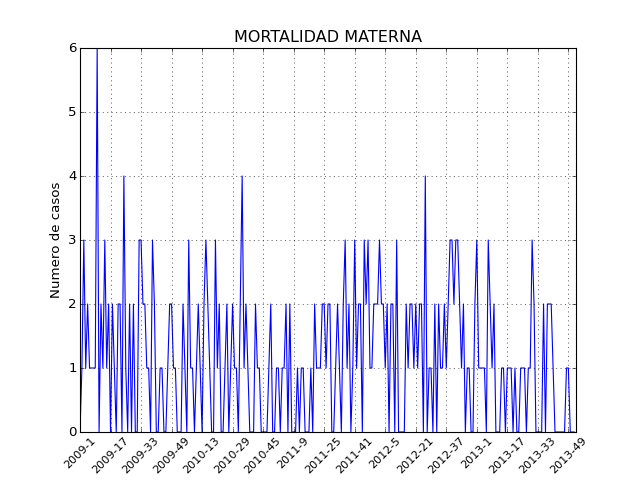

<IPython.core.display.Javascript object>


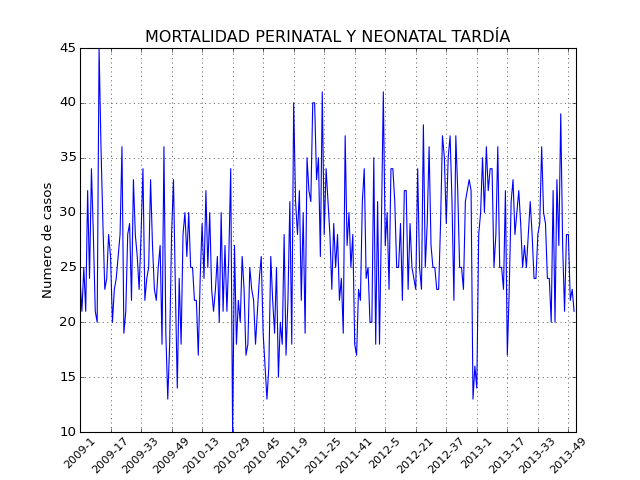

<IPython.core.display.Javascript object>


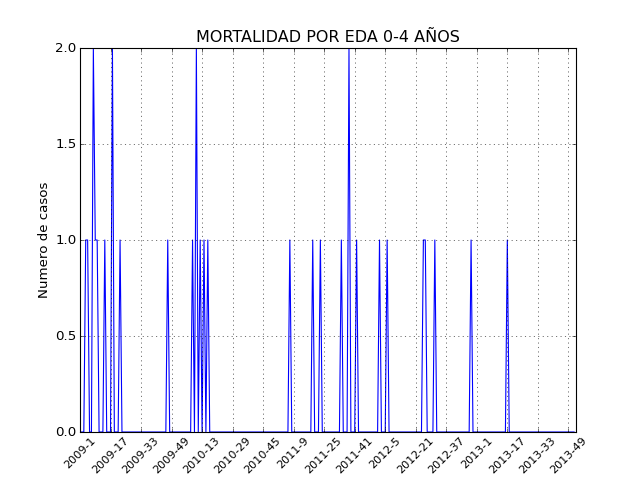

<IPython.core.display.Javascript object>


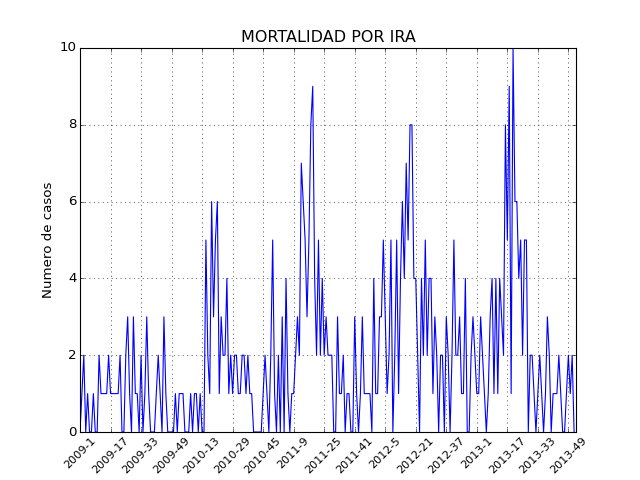

<IPython.core.display.Javascript object>


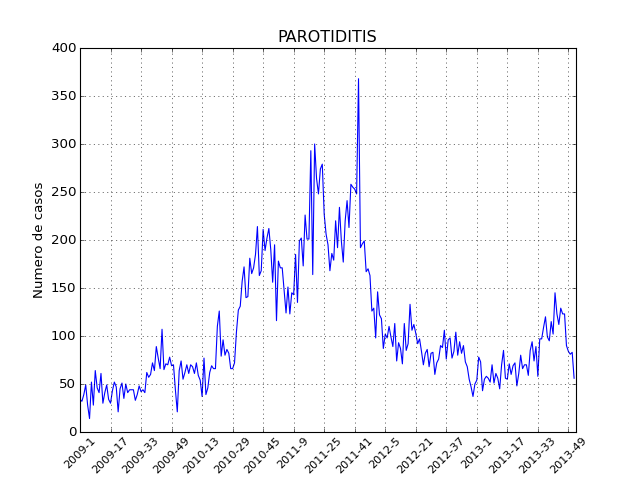

<IPython.core.display.Javascript object>


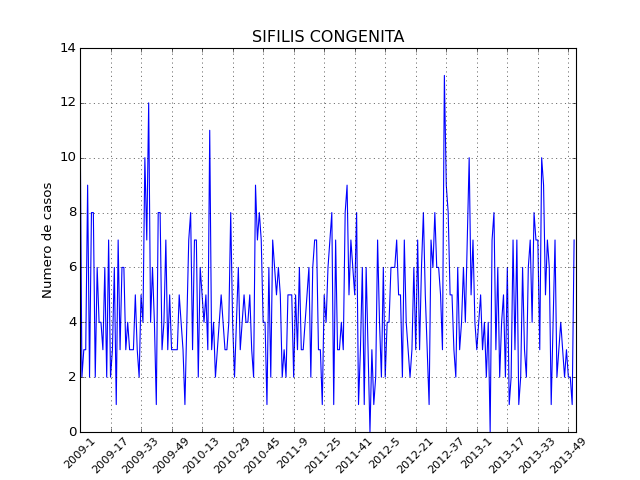

<IPython.core.display.Javascript object>


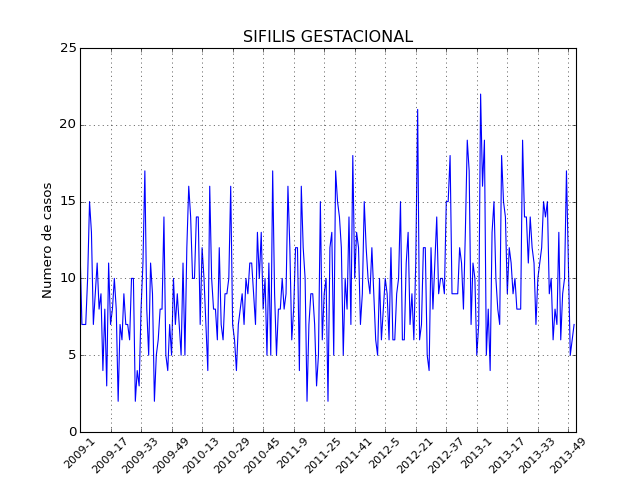

<IPython.core.display.Javascript object>


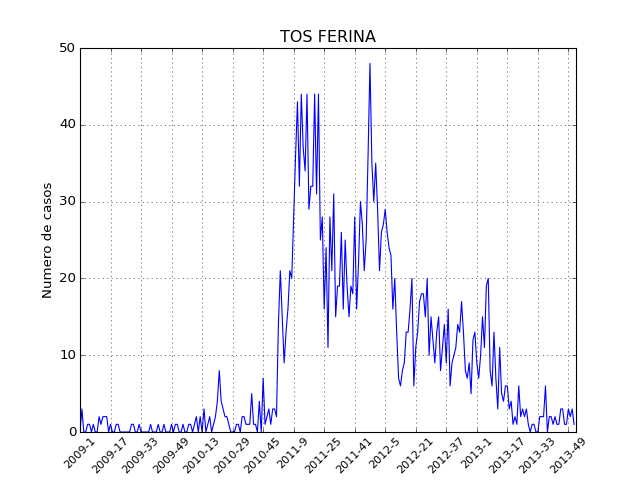

<IPython.core.display.Javascript object>


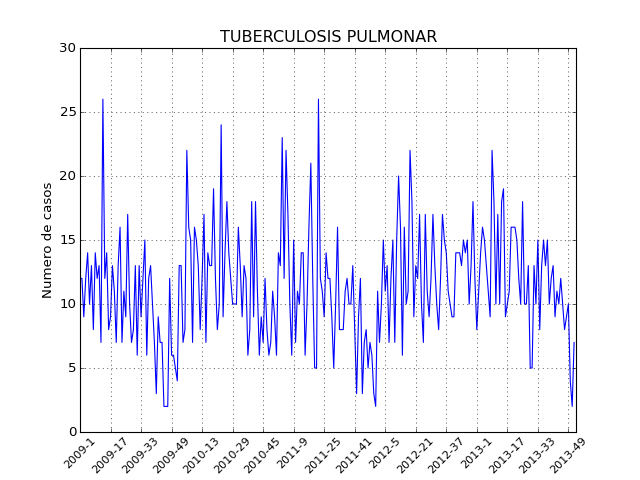

<IPython.core.display.Javascript object>


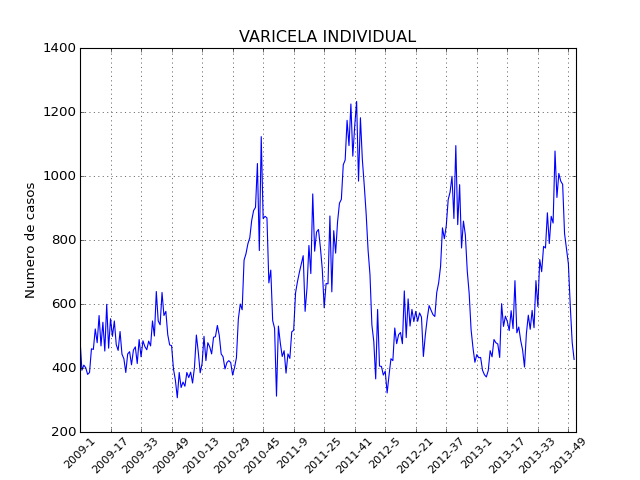

<IPython.core.display.Javascript object>


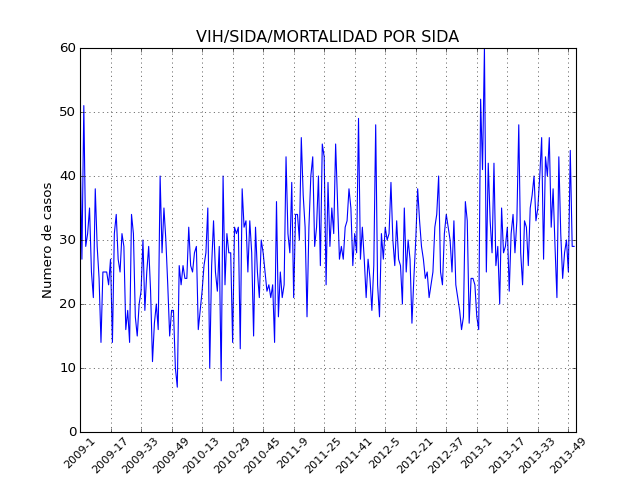

<IPython.core.display.Javascript object>


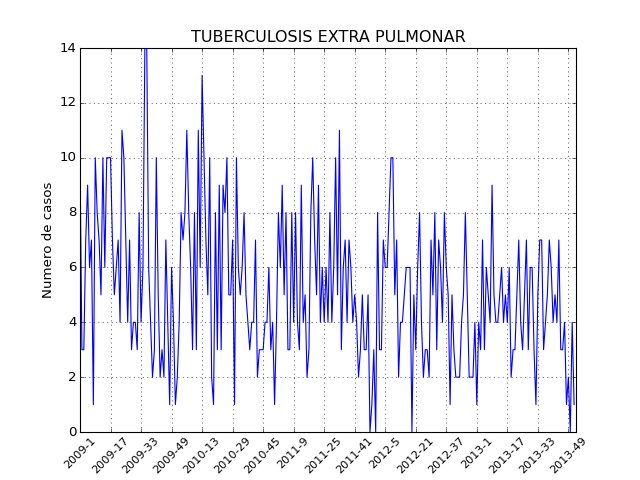

<IPython.core.display.Javascript object>


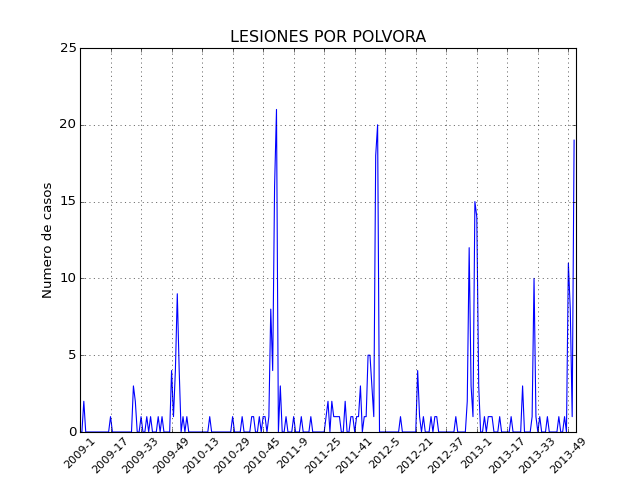

<IPython.core.display.Javascript object>


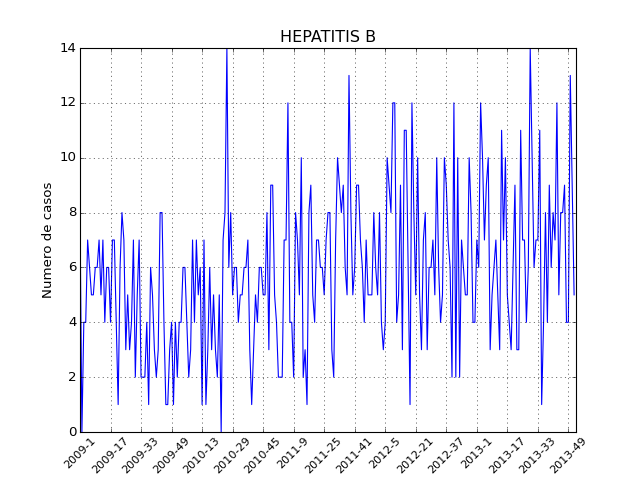

<IPython.core.display.Javascript object>


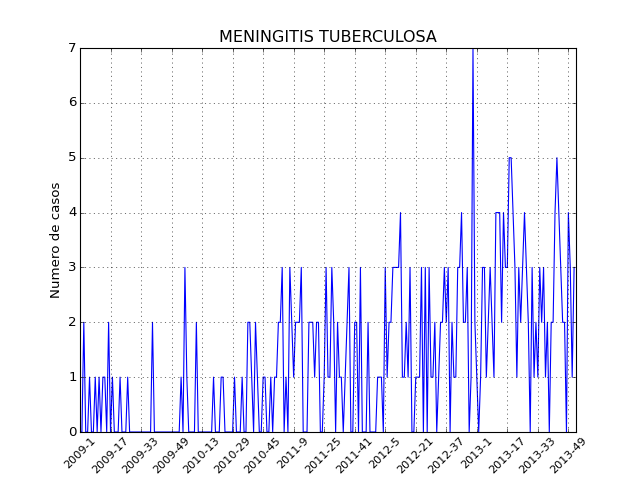

<IPython.core.display.Javascript object>


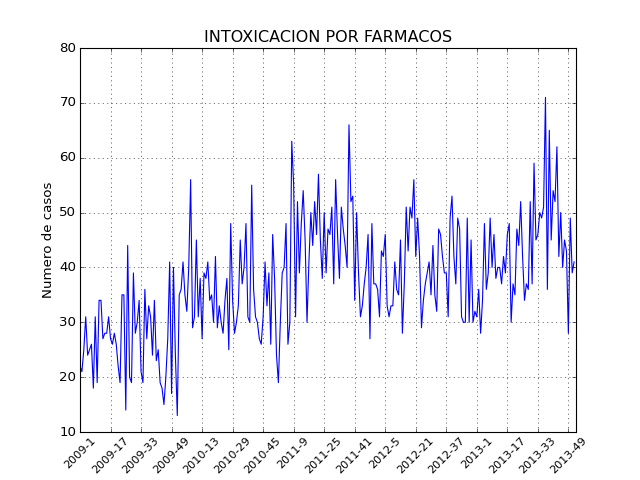

<IPython.core.display.Javascript object>


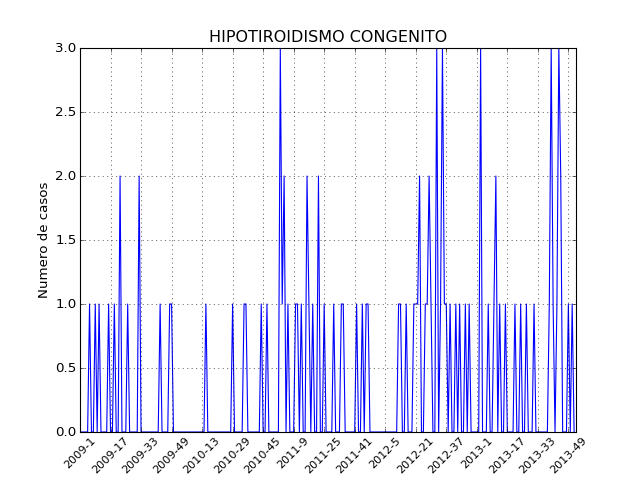

<IPython.core.display.Javascript object>


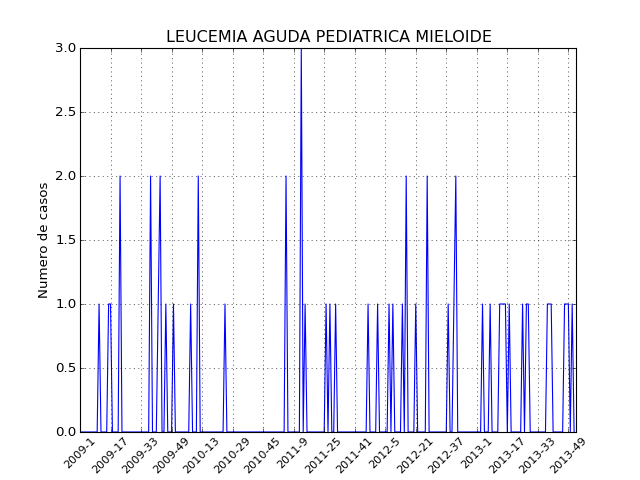

<IPython.core.display.Javascript object>


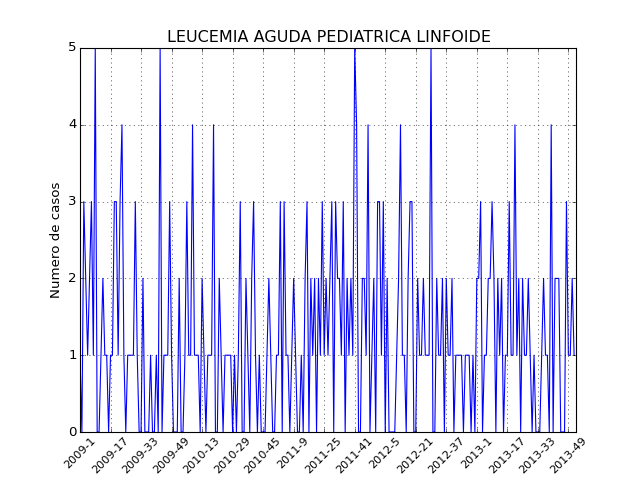

In [5]:
#Grafica todos los eventos desde 2009 a 2013 si se tienen datos en todos estos años
for i in range(UbiBog[0],FinBog[0]+1):
    Datos=np.array([])
    for j in range(0,len(Libros)):
        #Si encuentra la enfermedad en el siguiente libro entonces:
        if MxLibros[0][i,2] in MxLibros[j][UbiBog[j]:FinBog[j]+1,2]:
            k= int(np.argwhere(MxLibros[j][UbiBog[j]:FinBog[j]+1,2] == MxLibros[0][i,2]))+UbiBog[j]
            Datos=np.concatenate((Datos,MxLibros[j][int(k),3:-1]))
        else:
            print 'No se encontro '+ MxLibros[0][i,2] + ' en ' + Archivos[j] 
            break

    plt.figure()
    plt.title(MxLibros[0][i,2])
    plt.ylabel('Numero de casos')
    plt.xlim(0,len(Datos))
    plt.grid()
    plt.xticks(range(0,len(Semana),16),SemT,size='small',rotation=45)
    plt.plot(range(0,len(Datos)),Datos);

# Versiones de software:

In [6]:
%reload_ext version_information
%version_information numpy, matplotlib, openpyxl

Software versions
Python 2.7.9 64bit [GCC 4.9.2]
IPython 3.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.1
numpy 1.8.2
matplotlib 1.4.3
openpyxl 2.2.5
Mon Jul 20 13:26:48 2015 COT